In [2]:

import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [3]:
# Import des données
data = pd.read_excel('../MT15_exam_acp_classification.xls')
data.head()

Unnamed: 0  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   Client 1  12669  9656     7561     214              2674        1338
1   Client 2   7057  9810     9568    1762              3293        1776
2   Client 3   6353  8808     7684    2405              3516        7844
3   Client 4  13265  1196     4221    6404               507        1788
4   Client 5  22615  5410     7198    3915              1777        5185

In [4]:
df=data.iloc[:,1:7]

In [5]:
x = df.values
(x)

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [6]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z = sc.fit_transform(x)

In [7]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

6


In [14]:
#valeurs propres et variances par chaque composante:
# valeurs propres
variance = acp.explained_variance_

eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval[0:2])


[2.64497357 1.70258397]


In [15]:
# ratio de réprésentation des valeurs propres
print(acp.explained_variance_ratio_)

[0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]


In [ ]:
# au total les 2 composantes conservent 72% de l'information totale . 


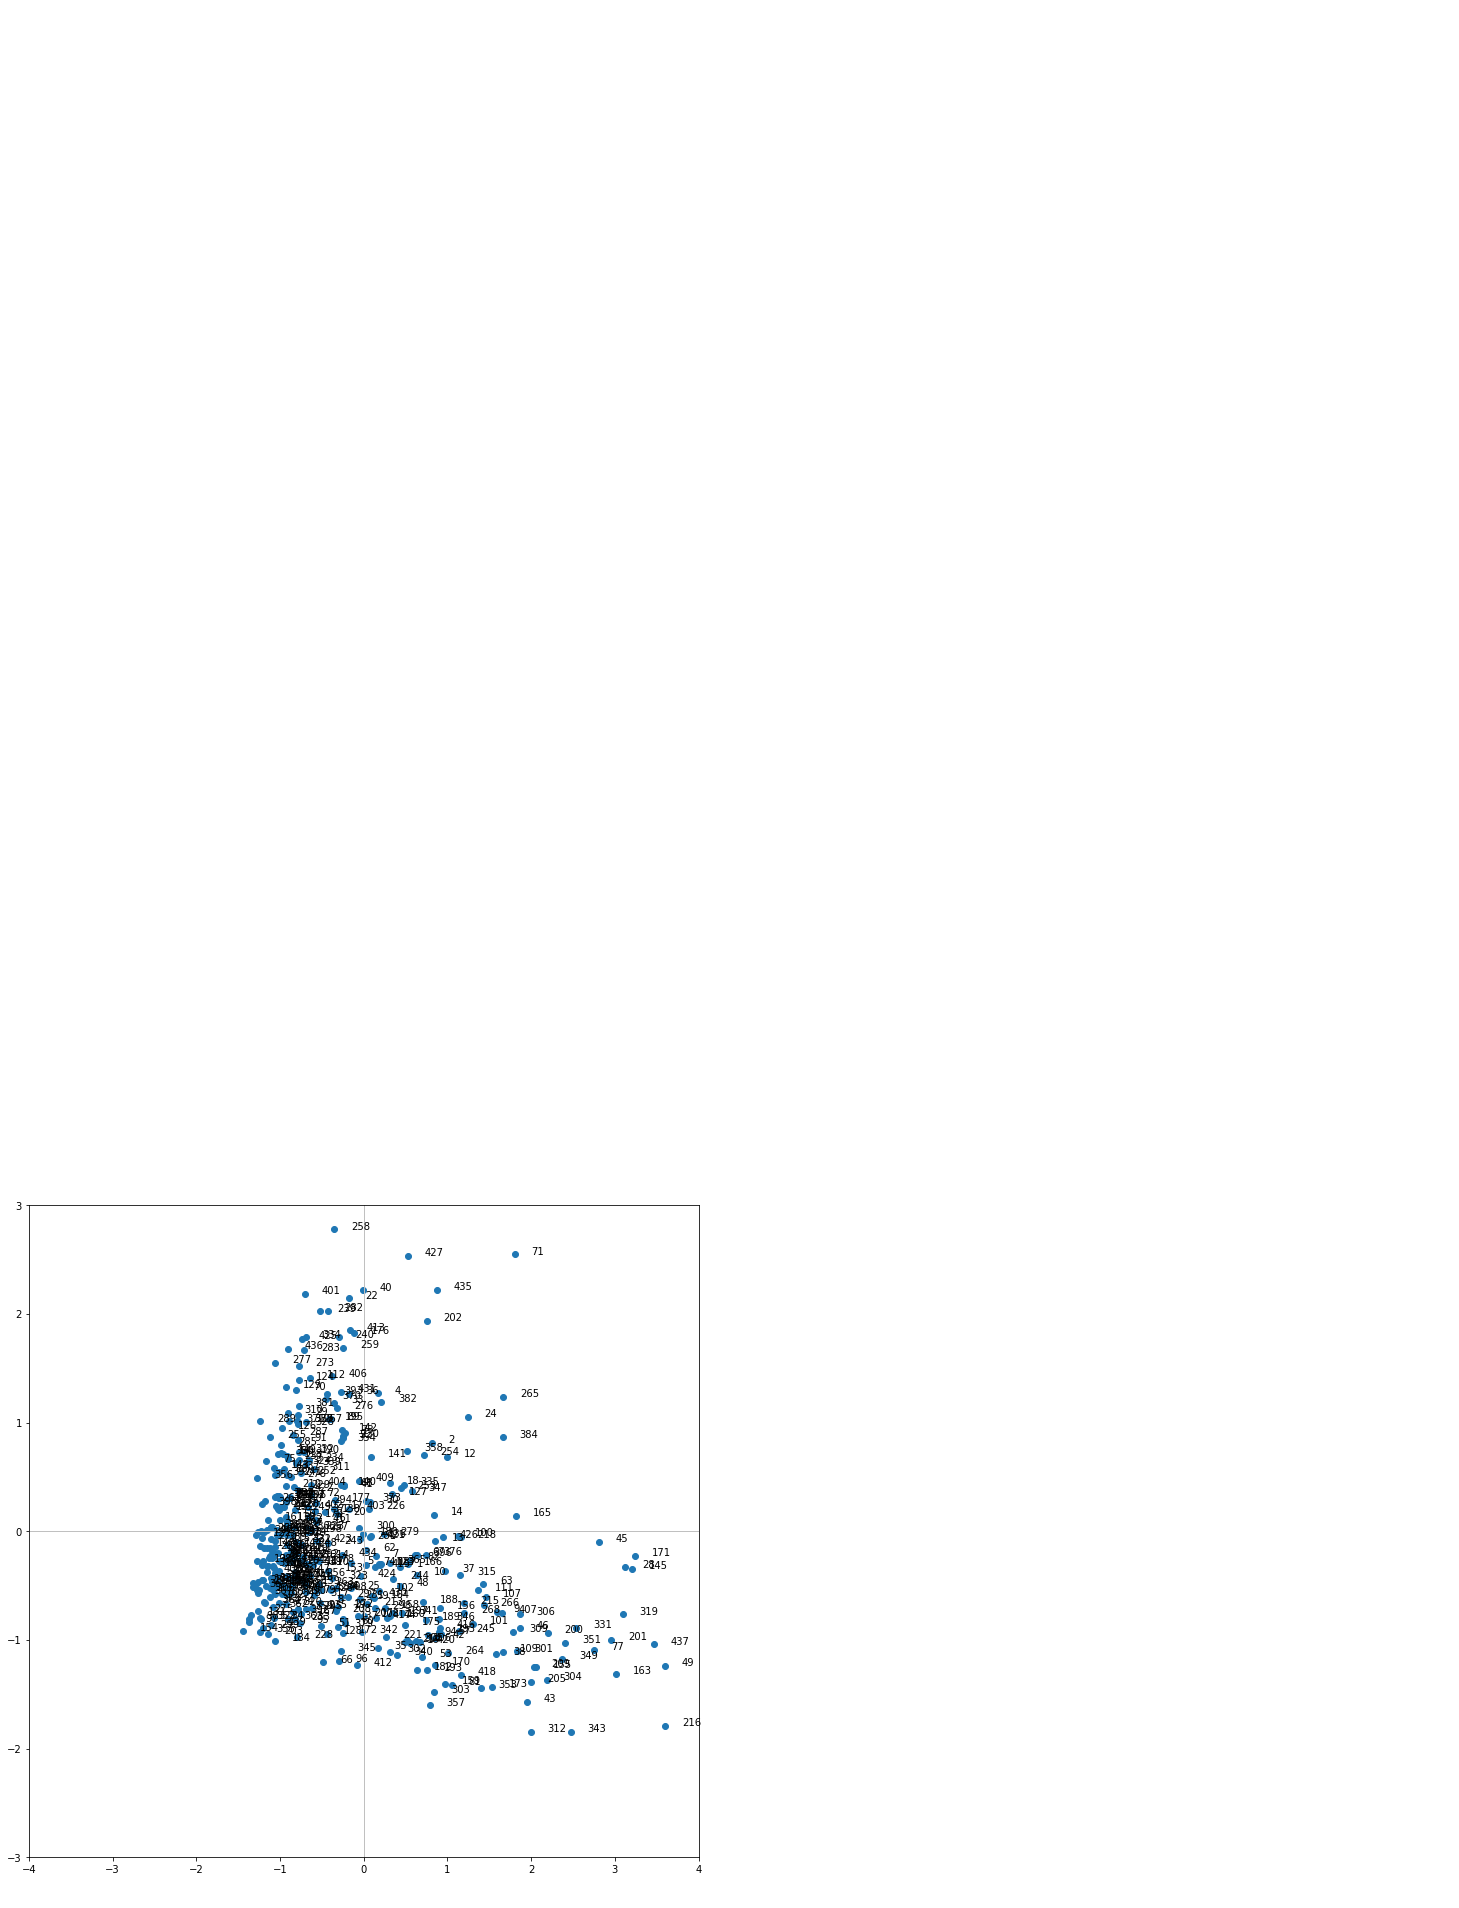

In [16]:
#positionnement des individus dans le plan :
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(440):
     plt.annotate(data.index[i],(coord[i,0]+0.2,coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [ ]:
# La majorité des individus s'entassent au milieu du graphique. Cela montre que beaucoup d'indiviuds ont des comportements similaires dans leurs dépenses anuelles . 
#On remarque deux groupes d'invididus qui s'opposent par rapport à l'axe 2 .


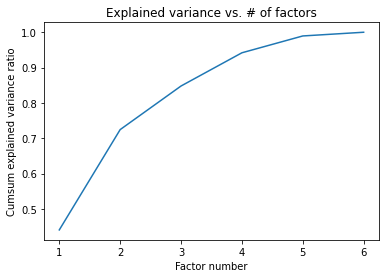

In [17]:
# cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [ ]:
#C'est constant à partir de 5 on prend les 5 premieres composantes .

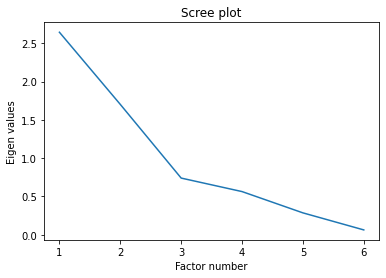

In [18]:
# scree plot : éboulis des valeurs propres

plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

In [ ]:
#La plus grande cassure se situe au 3éme composantes , donc on garde les 3 premieres composantes .

In [19]:
#test des bâtons brisés
bk = 1/np.arange(n,0,-1)
print(bk)
bk = np.cumsum(bk)
print(bk)
bk = bk[::-1]
#print(bk)
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bk}))

[0.16666667 0.2        0.25       0.33333333 0.5        1.        ]
[0.16666667 0.36666667 0.61666667 0.95       1.45       2.45      ]
   Val.Propre    Seuils
0    2.644974  2.450000
1    1.702584  1.450000
2    0.740065  0.950000
3    0.563730  0.616667
4    0.285676  0.366667
5    0.062971  0.166667


In [ ]:
#si la valeur propre est supérieur au seuil le facteur est à retenir 
# Ici , on retient le 1er et le 2éme axe seulement .


In [ ]:
#les 3 méthodes donnent des résultats différents on se place dans le cadre de la 2éme méthode . on garde 3 premiers axe dans l'étude .

In [21]:
# contribution des individus dans l'inertie totale
# les carrés des distances à l’origine des individus
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

      ID        d_i
0      0   0.632268
1      1   0.566947
2      2   5.436559
3      3   1.283337
4      4   2.487360
..   ...        ...
435  435   8.093296
436  436   6.084971
437  437  13.899635
438  438   1.195152
439  439   2.082350

[440 rows x 2 columns]


In [22]:
# qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS3_3':cos2[:,2]}))

      id    COS2_1    COS2_2    COS3_3
0      0  0.059091  0.147225  0.031390
1      1  0.332872  0.190238  0.179497
2      2  0.121024  0.122206  0.426887
3      3  0.472434  0.332015  0.020706
4      4  0.011117  0.649903  0.001766
..   ...       ...       ...       ...
435  435  0.093651  0.609412  0.045301
436  436  0.133861  0.462130  0.330898
437  437  0.864131  0.077791  0.036591
438  438  0.705153  0.000755  0.055871
439  439  0.586514  0.356281  0.044718

[440 rows x 4 columns]


In [23]:
# contributions des individus aux axes
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(9*eigval[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]}))

      id     CTR_1     CTR_2     CTR_3
0      0  0.001569  0.006075  0.002980
1      1  0.007928  0.007039  0.015279
2      2  0.027640  0.043358  0.348437
3      3  0.025469  0.027807  0.003990
4      4  0.001162  0.105496  0.000660
..   ...       ...       ...       ...
435  435  0.031840  0.321874  0.055045
436  436  0.034218  0.183515  0.302302
437  437  0.504567  0.070564  0.076360
438  438  0.035403  0.000059  0.010025
439  439  0.051306  0.048417  0.013981

[440 rows x 4 columns]


Représentation des variables

In [24]:
# Nous avons besoin des vecteurs propres pour l’analyse des variables.
# le champ components_ de l'objet ACP
print(acp.components_)
 #racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
 #corrélation des variables avec les axes
corvar = np.zeros((6,6))
for k in range(6):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]
[[ 0.06974378  0.68886221 -0.6987601  -0.1777082  -0.02602031 -0.00904023]
 [ 0.88654635  0.10851973  0.05194998 -0.0654639   0.44179588 -0.00954582]
 [ 0.94206631 -0.19062039 -0.09323953  0.07957747 -0.1683631   0.18111491]
 [ 0.08324992  0.79761402  0.15346028  0.57714209 -0.01492942 -0.00392399]
 [ 0.89227411 -0.33303614 -0.11716213  0.12894882 -0.18153322 -0.17211849]
 [ 0.40444082  0.65790499  0.45069909 -0.41450107 -0.16820333 -0.01885419]]


In [25]:
#on affiche pour les 3 premiers axes : les corrélations
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2]}))

                 id     COR_1     COR_2     COR_3
0             Fresh  0.069744  0.688862 -0.698760
1              Milk  0.886546  0.108520  0.051950
2           Grocery  0.942066 -0.190620 -0.093240
3            Frozen  0.083250  0.797614  0.153460
4  Detergents_Paper  0.892274 -0.333036 -0.117162
5        Delicassen  0.404441  0.657905  0.450699


In [ ]:
#Les variables Milk Grocery Detergent_paper sont fortement corrélés à l'axe 1 
#Les variables Froze, et Fresh sont fortement corrélés à l'axe 2 


In [26]:
#Qualité de représentation des variables : 
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2]}))

                 id    COS2_1    COS2_2    COS2_3
0             Fresh  0.004864  0.474531  0.488266
1              Milk  0.785964  0.011777  0.002699
2           Grocery  0.887489  0.036336  0.008694
3            Frozen  0.006931  0.636188  0.023550
4  Detergents_Paper  0.796153  0.110913  0.013727
5        Delicassen  0.163572  0.432839  0.203130


In [ ]:
#Milk Grocery Detergents sont bien représentés sur l'axe 1 
#Frozen est plus ou moins bien représentés sur l'axe 2 


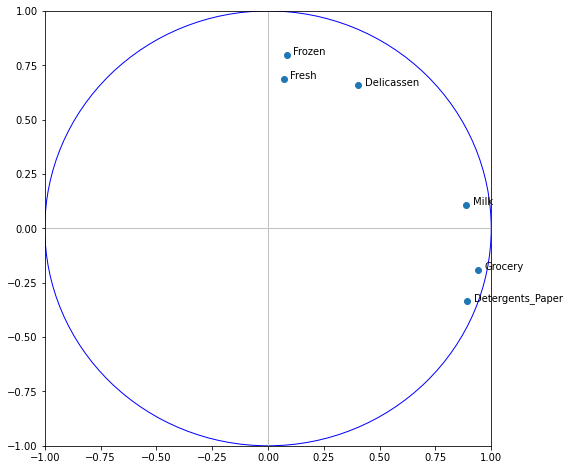

In [27]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(6):
     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [ ]:
# les variables Milk Grocery et Detergents_paper sont fortement corrélés à l'axe 1 et ont une forte qualité de représentation dans l'axxe 1 
#Les variables Fresh et Frozen sont fortement corrélés à l'axe 2 et ont une forte qualité de représentation dans l'axe 2

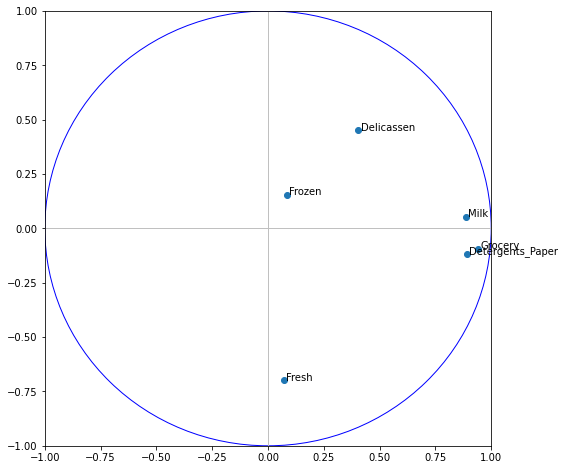

In [28]:
#cercle des corrélations pour le 1er et 3éme axe
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,2])

#affichage des étiquettes (noms des variables)
for j in range(6):
     plt.annotate(df.columns[j],(corvar[j,0]+0.01,corvar[j,2]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [ ]:
# même analyse pour l'axe 1 qui ne change pas .
#Fresh est fortement corrélé négativement à l'axe 3 

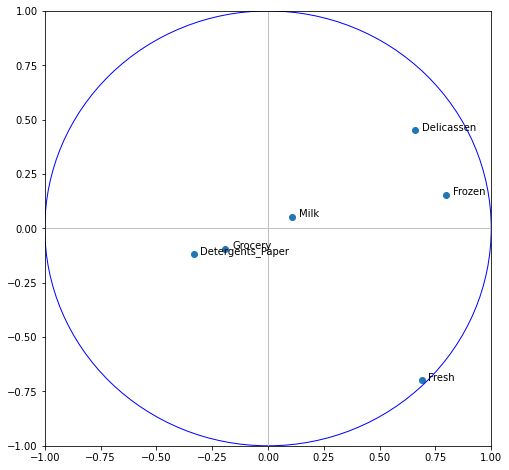

In [29]:
#cercle des corrélations pour les axes 2 et 3 :
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,1],corvar[:,2])

#affichage des étiquettes (noms des variables)
for j in range(6):
     plt.annotate(df.columns[j],(corvar[j,1]+0.03,corvar[j,2]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [ ]:
#Milk grocery detergentspaper sont des variables qui ne sont pas bien représentés dans les axes 2 et 3 .

In [ ]:
# En faisant une analyse de représentation des individus et du cercle de corrélation (2 premiers axes) on remarque que :
#On peut séparer les acheteurs en groupes d'individus . Ceux qui sont à droite du graphique ont des dépenses annuelles en milk grocery et detergents similaires
#ceux qui sont en haut du graphique ont des depenses annuelles en frozen ,fresh similaires

# CAH et K-means

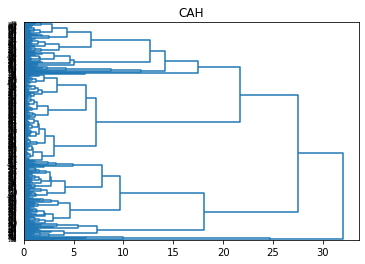

In [41]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

C = linkage(Z,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(C,labels=data.index,orientation='right',color_threshold=0)
plt.show()

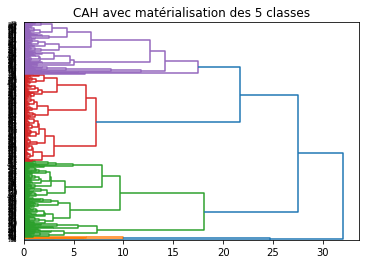

In [53]:
#matérialisation des 4 classes (hauteur t = 19)

plt.title('CAH avec matérialisation des 5 classes')
dendrogram(C,labels=data.index,orientation='right',color_threshold=19)
plt.show()

In [54]:
groupes_cah = fcluster(C,t=19,criterion='distance')
print(groupes_cah)

[3 3 3 4 5 3 3 3 4 3 3 4 5 5 5 4 3 3 5 3 5 4 5 5 3 3 4 4 3 5 5 4 5 5 4 3 5
 3 3 5 5 5 3 3 3 3 3 1 3 3 4 4 5 3 5 4 3 3 4 3 3 1 3 3 4 3 3 5 4 4 5 5 4 5
 3 4 4 3 4 4 4 3 3 4 3 1 1 5 4 5 4 5 3 5 3 4 3 4 4 4 3 3 3 5 4 4 3 3 3 3 4
 3 5 4 4 4 4 4 4 4 4 4 4 3 5 5 5 5 3 5 4 4 4 4 4 4 3 3 5 4 5 5 5 4 3 3 4 4
 4 5 4 4 4 3 4 3 3 4 3 3 3 4 4 3 3 3 3 4 4 4 3 3 3 3 4 3 5 5 3 4 5 5 3 2 4
 3 4 3 3 3 5 4 4 3 4 5 5 3 4 4 3 3 3 4 4 3 4 3 3 3 5 3 4 3 3 3 3 4 3 4 4 3
 4 4 4 4 5 4 4 4 5 3 5 4 5 4 4 4 4 5 5 5 4 5 3 3 4 4 3 4 4 3 4 5 3 5 3 4 5
 5 4 4 5 4 3 3 3 5 3 4 4 4 3 5 4 4 5 5 4 5 4 3 5 5 5 5 4 5 4 5 4 4 4 3 5 4
 4 3 3 4 5 3 3 3 3 3 3 4 4 3 5 5 3 4 4 3 4 4 4 3 4 4 4 3 5 5 4 4 5 4 4 3 5
 1 5 5 4 4 5 4 3 3 3 3 4 3 3 5 4 3 4 3 4 3 5 4 4 3 3 4 4 4 4 4 4 3 4 4 4 4
 5 5 3 5 4 4 3 5 4 3 5 5 5 4 3 4 4 4 4 4 4 4 4 5 4 4 3 4 4 4 4 5 5 5 4 4 5
 3 3 3 4 3 3 5 4 3 3 3 3 4 3 5 5 3 3 5 3 5 4 4 3 5 5 4 3 5 5 3 4 4]


In [43]:
#Plus la distance est importante plus la différence entre les classes est importante . On pense que si on depasse les 4 classes  il n'y'aura pas autant de distinction entre les classes . Si on choisit moins de 4 il n'y'aura pas assez de distinction entre les classes .

In [55]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)  # on choisit 4 avec l'étude du dessus (choisi graçe au CAH)
kmeans.fit(Z)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))
#kmean commence par 0 , classe 1 =0

[0 4 4 0 1 0 0 0 0 4 4 0 1 4 4 0 4 0 0 0 0 0 1 4 4 0 0 0 4 1 0 0 0 1 0 4 1
 4 4 1 1 0 4 4 4 4 4 3 4 4 0 0 1 4 0 0 3 4 0 0 0 3 0 4 0 3 0 4 0 0 1 1 0 1
 0 0 0 4 0 0 0 4 4 0 0 3 3 1 0 1 0 0 3 1 4 0 0 0 0 0 4 4 0 1 0 0 4 4 0 4 0
 4 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 4 0 0
 0 1 0 0 0 0 0 4 4 0 0 4 4 0 0 4 0 4 4 0 0 0 4 4 0 4 0 4 1 0 0 0 0 1 4 2 0
 0 0 0 4 4 0 0 0 4 0 1 1 4 0 0 4 4 1 0 0 4 0 0 0 4 0 3 0 0 4 4 4 0 4 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 4 4 0 0 0 0 0 3 0 1 4 1 0 0 1
 1 0 0 0 0 4 4 4 0 4 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 4 0 0
 0 0 0 0 0 4 4 4 4 4 4 0 0 4 0 1 4 0 0 4 0 0 0 4 0 0 0 0 0 1 0 0 0 0 0 4 0
 3 1 1 0 0 0 0 4 4 0 4 0 0 4 1 0 4 0 4 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 4 1 0 0 1 1 1 0 4 0 0 0 0 0 0 0 0 1 0 0 4 0 0 0 0 1 0 0 0 0 1
 4 0 0 0 0 0 1 0 0 4 0 4 0 4 0 0 0 0 1 4 1 0 0 0 1 0 0 0 1 1 4 0 0]
      0
0     0
0   270
0   269
0   267
0   263
..  ...
4   312
4   315
4    82
4   304
4   306

[440 rows 

[0.5909042  0.33968746 0.34525855 0.36904038 0.36123482 0.31397596
 0.32522936 0.30566406 0.30759366 0.31012354 0.31132598 0.25190248
 0.25588198 0.286893   0.26524248]


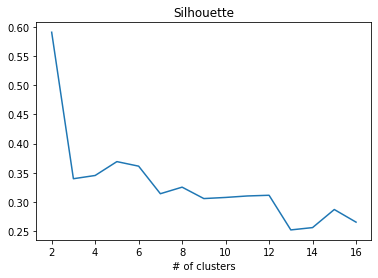

In [50]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 16
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(Z)
    res[k] = metrics.silhouette_score(Z,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

In [ ]:
#L'idéal de la métrique silhouette est quand on a quelquechose égale à 1 donc ici l'idéal du nombre cluster est égale à 2 .

In [ ]:
#Comparaison entre CAH et K means .

In [56]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0    0   1  2  3   4
row_0                   
1        0   0  0  5   0
2        0   0  1  0   0
3       55   1  0  5  92
4      177   0  0  0   0
5       38  62  0  0   4

Quand on analyse la correspondance entre les deux méthodes on remarque que : 
La classe 1 de CAH a 5 individus qui sont dans la classe 3 de K means et 0 ailleurs . 
La classe 2 de CAH a 1 qui est dans la classe 2 
La classe 3 de CAH possédé la majorité de ses individus dans la classe 0 de K means 
La classe 4 de CAH tout ses individus dans la classe 1 de K means 
On voit bien qu'il y'a correspondance entre les deux groupes . 


Analyse des groupes de K means : 

In [57]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(data.index[idg],groupes_cah[idg]))

      0
1    47
1    61
1    85
1    86
1   333
..  ...
5   311
5   310
5   176
5   335
5   127

[440 rows x 1 columns]


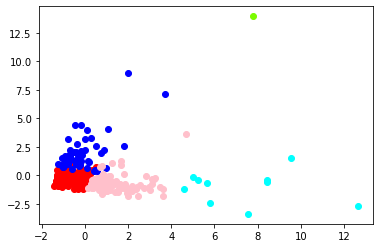

In [61]:
#ACP pour l'analyse des K means :


#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua','pink'],[0,1,2,3,4]):
    plt.scatter(coord[kmeans.labels_==k,0],coord[kmeans.labels_==k,1],c=couleur)
plt.show()
# blue 2éme classe par exemple .